In [1]:
pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.2 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=452657140eb1a520be850a073ec9a76e7a481b08a1a6abdb60a1e07daa7562cb
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=5bd3a937c74c6603d0b76d1e5ab80d3b49693fc926ff92db069bc336079aadab
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [2]:
pip install pandas scipy

In [28]:
import requests
from scipy.io import arff
import pandas as pd
from io import StringIO

# Step 1: Download and load ARFF file directly from GitHub into memory
url = 'https://raw.githubusercontent.com/DarceCat/Adrian-Milroy/main/dataset_31_credit-g.arff'
response = requests.get(url)

# Step 2: Load ARFF file from the response content
data = arff.loadarff(StringIO(response.text))

# Step 3: Convert to a DataFrame
df = pd.DataFrame(data[0])

# Step 4: Decode byte strings to regular strings for object-type columns
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Step 5: Inspect the cleaned DataFrame
print(df.head())


  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...

<ipython-input-28-1f9bb0269424>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


In [29]:
# Decode byte strings for each column individually using map
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Inspect the cleaned DataFrame
print(df.head())

  checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...

In [30]:
#Examine the dataset
print("#Rows: ",df.shape[0])
print("#Columns: ", df.shape[1])
print("\nColumn Names:", df.columns.tolist())
print("\nData Types of Each Column:\n", df.dtypes)

# Print the range of values per column
column_ranges = df.describe(include='all').transpose()[['min', 'max']]
print(column_ranges)

print("___Missing Values___")
print(df.isnull().sum())

#Rows:  1000
#Columns:  21

Column Names: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']

Data Types of Each Column:
 checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_depe

In [31]:
# List of columns that need one-hot encoding
categorical_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status',
                       'employment', 'personal_status', 'other_parties', 'property_magnitude',
                       'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

# Check the shape after encoding
print("New shape after encoding:", df_encoded.shape)

   duration  credit_amount  installment_commitment  residence_since   age  \
0       6.0         1169.0                     4.0              4.0  67.0   
1      48.0         5951.0                     2.0              2.0  22.0   
2      12.0         2096.0                     2.0              3.0  49.0   
3      42.0         7882.0                     2.0              4.0  45.0   
4      24.0         4870.0                     3.0              4.0  53.0   

   existing_credits  num_dependents  checking_status_<0  \
0               2.0             1.0                True   
1               1.0             1.0               False   
2               1.0             2.0               False   
3               1.0             2.0                True   
4               2.0             2.0                True   

   checking_status_>=200  checking_status_no checking  ...  \
0                  False                        False  ...   
1                  False                        False  ...

In [32]:
#Examine the dataset
print("#Rows: ",df_encoded.shape[0])
print("#Columns: ", df_encoded.shape[1])
print("\nColumn Names:", df_encoded.columns.tolist())
print("\nData Types of Each Column:\n", df_encoded.dtypes)

# Print the range of values per column
column_ranges = df_encoded.describe(include='all').transpose()[['min', 'max']]
print(column_ranges)

print("___Missing Values___")
print(df_encoded.isnull().sum())

#Rows:  1000
#Columns:  49

Column Names: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'checking_status_<0', 'checking_status_>=200', 'checking_status_no checking', 'credit_history_critical/other existing credit', 'credit_history_delayed previously', 'credit_history_existing paid', 'credit_history_no credits/all paid', 'purpose_domestic appliance', 'purpose_education', 'purpose_furniture/equipment', 'purpose_new car', 'purpose_other', 'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining', 'purpose_used car', 'savings_status_500<=X<1000', 'savings_status_<100', 'savings_status_>=1000', 'savings_status_no known savings', 'employment_4<=X<7', 'employment_<1', 'employment_>=7', 'employment_unemployed', 'personal_status_male div/sep', 'personal_status_male mar/wid', 'personal_status_male single', 'other_parties_guarantor', 'other_parties_none', 'property_magnitude_life insurance', 'property_magnitude_no known p

#Do a logistic regression to start things off and get an idea of each parameter's importance

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'class_good' is the target variable
X = df_encoded.drop('class_good', axis=1)
y = df_encoded['class_good']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.768
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.51      0.56        72
        True       0.82      0.87      0.84       178

    accuracy                           0.77       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.76      0.77      0.76       250



#Extract and visualize the feature importance

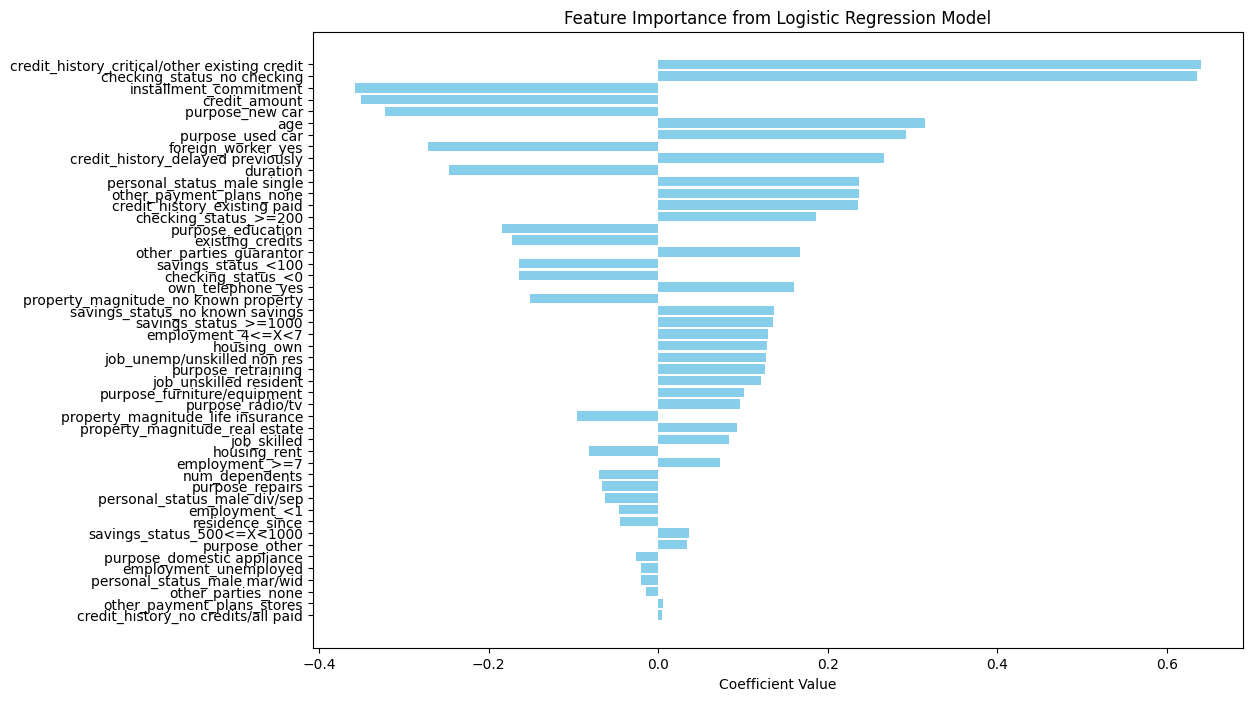

Top 10 Contributing Features:
                                          Feature  Absolute Coefficient
10  credit_history_critical/other existing credit              0.639826
9                     checking_status_no checking              0.635413
2                          installment_commitment              0.357371
1                                   credit_amount              0.350709
17                                purpose_new car              0.322320
4                                             age              0.314573
22                               purpose_used car              0.292763
47                             foreign_worker_yes              0.271462
11              credit_history_delayed previously              0.265856
0                                        duration              0.246865


In [34]:
import matplotlib.pyplot as plt

# Retrieve feature names
feature_names = X.columns

# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression Model')
plt.gca().invert_yaxis()  # To have the largest coefficients at the top
plt.show()

# Print the top 10 contributing features by absolute value of coefficients
top_10_features = feature_importance.head(10)
print("Top 10 Contributing Features:")
print(top_10_features[['Feature', 'Absolute Coefficient']])


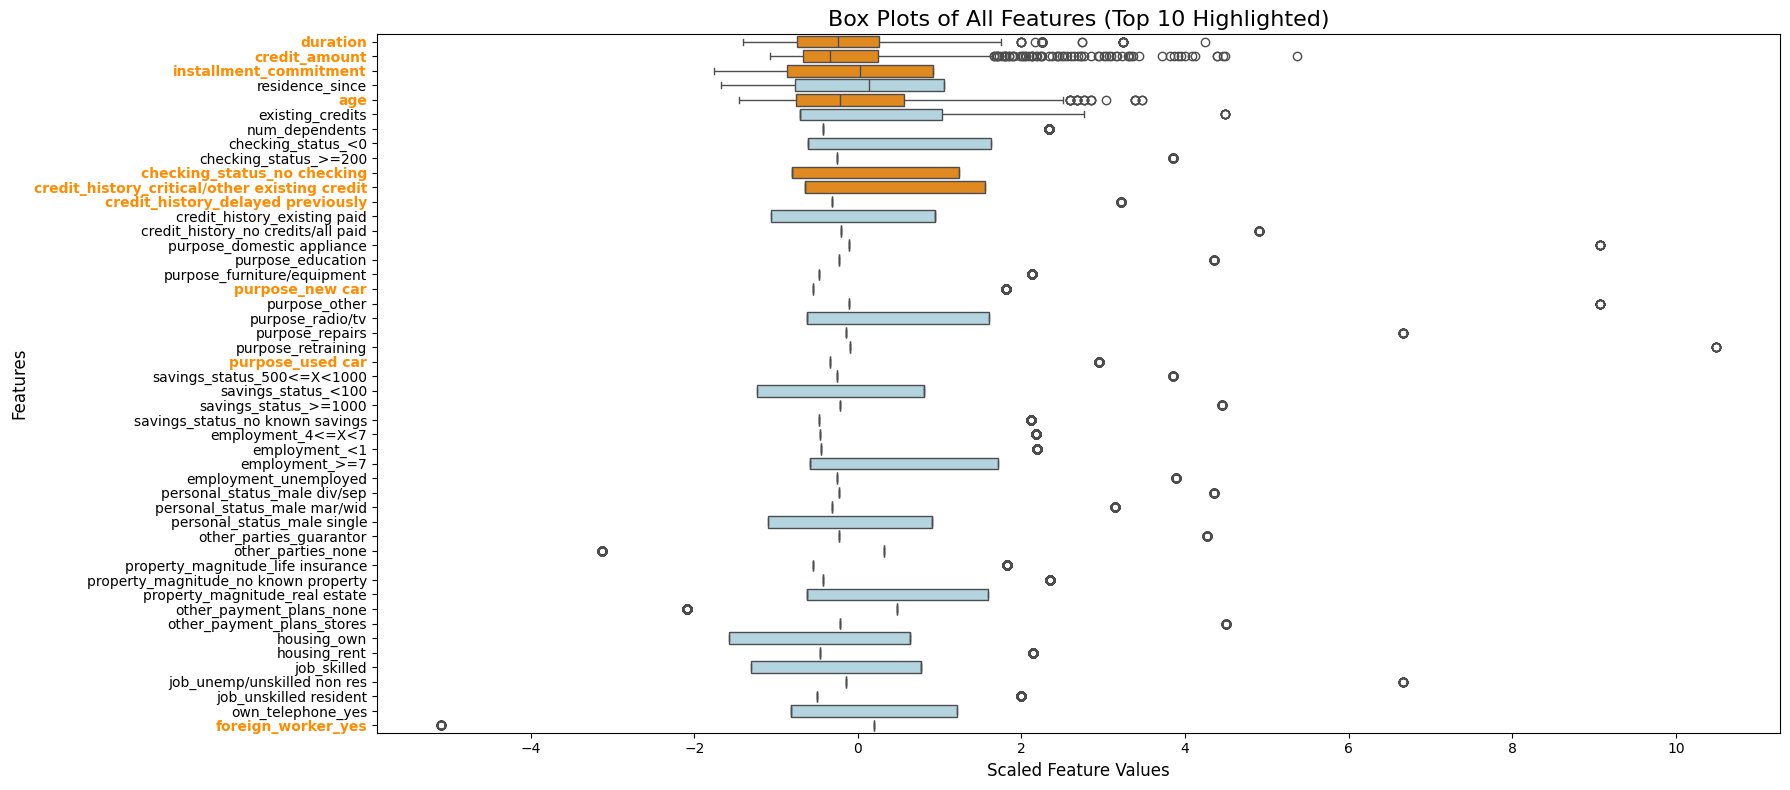

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the scaled features for easier plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Get the top 10 contributing features based on the absolute coefficient values
top_10_features = feature_importance.head(10)['Feature'].values

# Create a color palette where the top 10 features have a different color
colors = ['lightblue' if feature not in top_10_features else 'darkorange' for feature in X.columns]

# Set the size of the plot
plt.figure(figsize=(18, 8))

# Create box plots for all the features, highlighting the top 10 features
sns.boxplot(data=X_scaled_df, orient="h", palette=colors)

# Customize y-axis labels: bold and orange for top 10 features
ax = plt.gca()
for label in ax.get_yticklabels():
    if label.get_text() in top_10_features:
        label.set_fontweight('bold')  # Bold the label
        label.set_color('darkorange')  # Make it orange

# Add titles and labels
plt.title("Box Plots of All Features (Top 10 Highlighted)", fontsize=16)
plt.xlabel("Scaled Feature Values", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

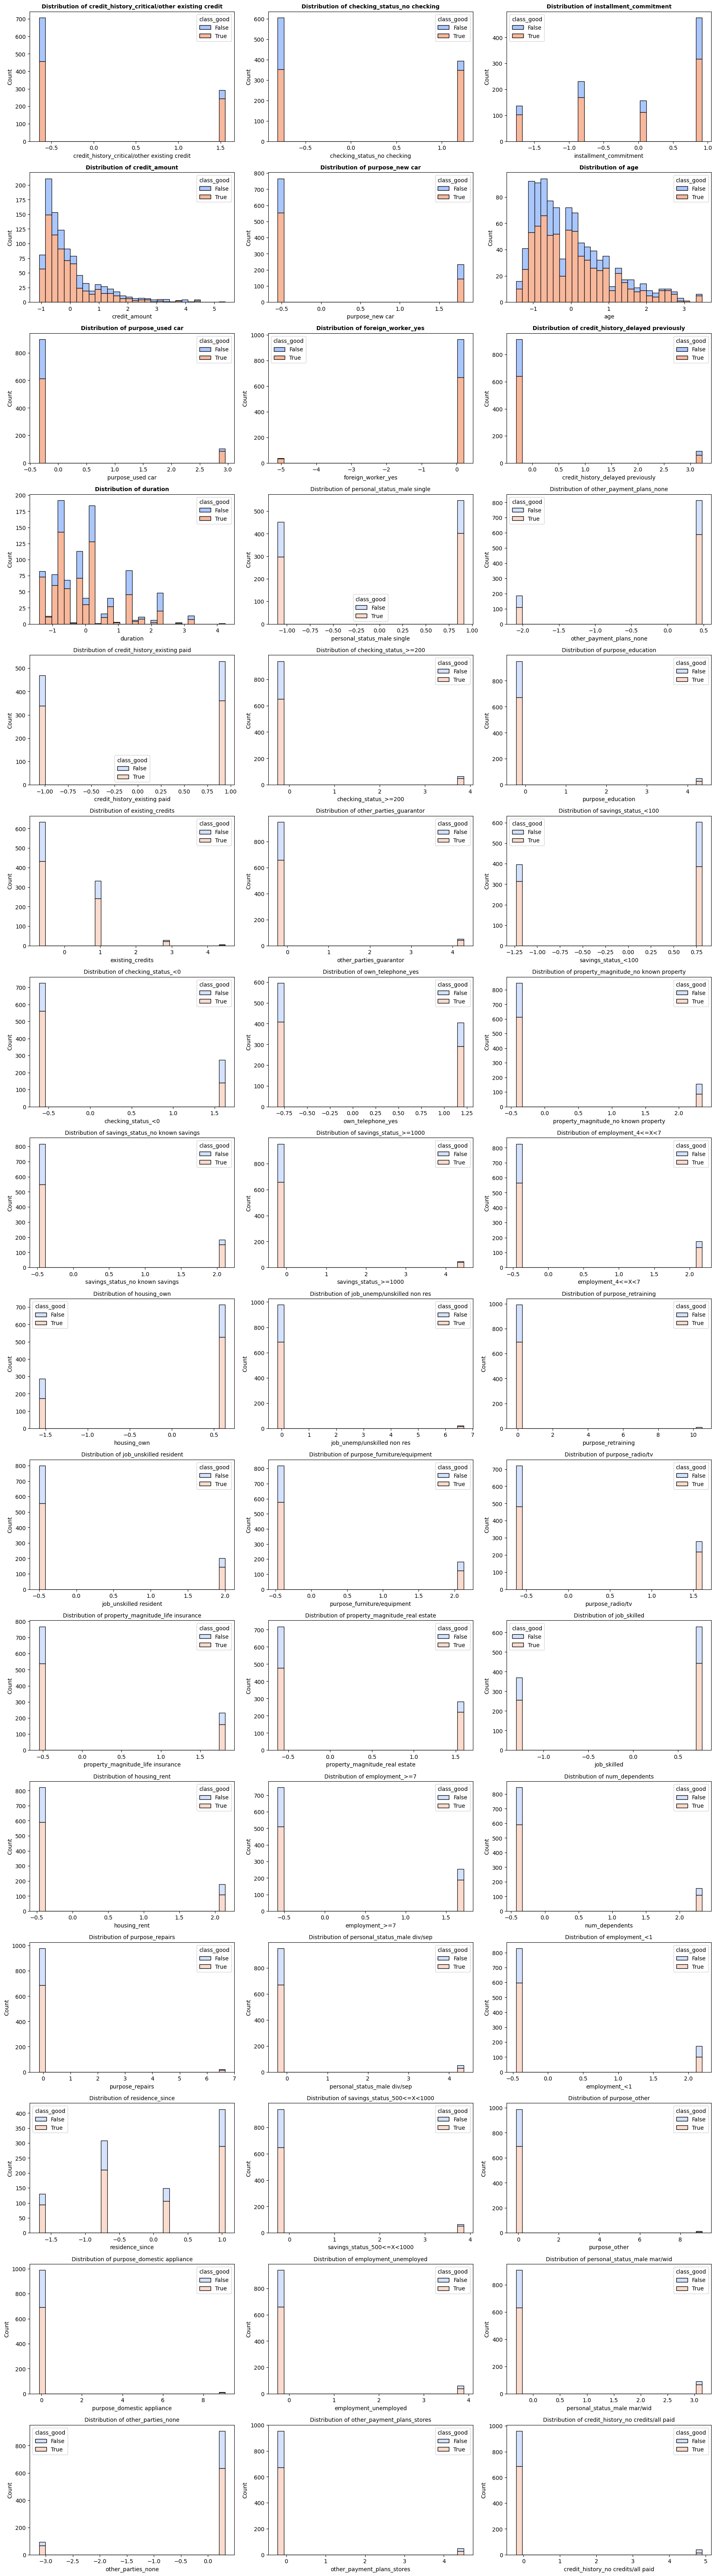

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort features based on their absolute coefficient (feature importance)
sorted_features = feature_importance['Feature'].values

# Set up a grid of subplots
num_features = X_scaled_df.shape[1]
num_rows = (num_features // 3) + 1  # Assuming 3 plots per row

plt.figure(figsize=(18, num_rows * 4))

# Iterate through the sorted features and plot histograms
for i, feature in enumerate(sorted_features):
    plt.subplot(num_rows, 3, i + 1)

    # Combine the feature with class_good for easier plotting
    data = pd.concat([X_scaled_df[feature], y], axis=1)
    data.columns = [feature, 'class_good']

    # Determine transparency (alpha) for top 10 features
    alpha_value = 1 if i < 10 else 0.5  # Top 10 features will have alpha=1, others alpha=0.5

    # Plot a histogram with hue as 'class_good'
    sns.histplot(data=data, x=feature, hue='class_good', multiple='stack', palette='coolwarm', bins=30, alpha=alpha_value)

    # Set titles and labels
    plt.title(f'Distribution of {feature}', fontsize=10, fontweight='bold' if i < 10 else 'normal')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd

# Assuming df_encoded has the 'credit_history_critical/other existing credit' and 'checking_status_no checking' columns

# Split 1: Datasets based on 'credit_history_critical/other existing credit'
dataset_credit_history_below_0_5 = df_encoded[df_encoded['credit_history_critical/other existing credit'] < 0.5]
dataset_credit_history_above_0_5 = df_encoded[df_encoded['credit_history_critical/other existing credit'] >= 0.5]

# Split 2: Datasets based on 'checking_status_no checking'
dataset_checking_status_below_0_5 = df_encoded[df_encoded['checking_status_no checking'] < 0.5]
dataset_checking_status_above_0_5 = df_encoded[df_encoded['checking_status_no checking'] >= 0.5]

# Display the shapes of the new datasets
print(f"Dataset (credit_history_critical < 0.5): {dataset_credit_history_below_0_5.shape}")
print(f"Dataset (credit_history_critical >= 0.5): {dataset_credit_history_above_0_5.shape}")
print(f"Dataset (checking_status_no checking < 0.5): {dataset_checking_status_below_0_5.shape}")
print(f"Dataset (checking_status_no checking >= 0.5): {dataset_checking_status_above_0_5.shape}")



Dataset (credit_history_critical < 0.5): (707, 49)
Dataset (credit_history_critical >= 0.5): (293, 49)
Dataset (checking_status_no checking < 0.5): (606, 49)
Dataset (checking_status_no checking >= 0.5): (394, 49)


#Let's examine the standard ML models on each side of the most important features

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming each dataset is loaded as:
# dataset_credit_history_below_0_5, dataset_credit_history_above_0_5, dataset_checking_status_below_0_5, dataset_checking_status_above_0_5

datasets = {
    'dataset_credit_history_below_0_5': dataset_credit_history_below_0_5,
    'dataset_credit_history_above_0_5': dataset_credit_history_above_0_5,
    'dataset_checking_status_below_0_5': dataset_checking_status_below_0_5,
    'dataset_checking_status_above_0_5': dataset_checking_status_above_0_5
}

# Dictionary to store metrics for each dataset and model
all_metrics = {}

# Loop through each dataset
for dataset_name, dataset in datasets.items():
    print(f"Processing dataset: {dataset_name}")

    # Split features and target
    X = dataset.drop('class_good', axis=1)
    y = dataset['class_good']

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Dictionary to store metrics for each model in the current dataset
    metrics = {}

    # 1. Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred_tree = decision_tree.predict(X_test)

    metrics['Decision Tree'] = {
        'accuracy': accuracy_score(y_test, y_pred_tree),
        'classification_report': classification_report(y_test, y_pred_tree)
    }

    # 2. Logistic Regression
    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log_reg = log_reg.predict(X_test_scaled)

    metrics['Logistic Regression'] = {
        'accuracy': accuracy_score(y_test, y_pred_log_reg),
        'classification_report': classification_report(y_test, y_pred_log_reg)
    }

    # 3. K-Means Clustering (unsupervised, using clusters as "predictions")
    kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
    kmeans.fit(X_train_scaled)
    y_pred_kmeans = kmeans.predict(X_test_scaled)

    # Map the clusters to the target labels for evaluation
    metrics['K-Means'] = {
        'accuracy': accuracy_score(y_test, y_pred_kmeans),
        'classification_report': classification_report(y_test, y_pred_kmeans)
    }

    # 4. SVM (Support Vector Machine)
    svm = SVC(random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)

    metrics['SVM'] = {
        'accuracy': accuracy_score(y_test, y_pred_svm),
        'classification_report': classification_report(y_test, y_pred_svm)
    }

    # Store metrics for the current dataset
    all_metrics[dataset_name] = metrics

# Print the evaluation metrics for each dataset and model
for dataset_name, model_metrics in all_metrics.items():
    print(f"Dataset: {dataset_name}")
    for model_name, metric in model_metrics.items():
        print(f"  Model: {model_name}")
        print("  Accuracy:", metric['accuracy'])
        print("  Classification Report:\n", metric['classification_report'])
        print("\n")


Processing dataset: dataset_credit_history_below_0_5
Processing dataset: dataset_credit_history_above_0_5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Processing dataset: dataset_checking_status_below_0_5
Processing dataset: dataset_checking_status_above_0_5
Dataset: dataset_credit_history_below_0_5
  Model: Decision Tree
  Accuracy: 0.6103286384976526
  Classification Report:
               precision    recall  f1-score   support

       False       0.47      0.60      0.53        78
        True       0.73      0.61      0.67       135

    accuracy                           0.61       213
   macro avg       0.60      0.61      0.60       213
weighted avg       0.64      0.61      0.62       213



  Model: Logistic Regression
  Accuracy: 0.7323943661971831
  Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.59      0.62        78
        True       0.77      0.81      0.79       135

    accuracy                           0.73       213
   macro avg       0.71      0.70      0.71       213
weighted avg       0.73      0.73      0.73       213



  Model: K-Means
  Accurac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Our best values:
-dataset_credit_history_below_0_5 = **SVM 74.17%**

-dataset_credit_history_above_0_5 = **SVM 82.95%**

-dataset_checking_status_below_0_5 = **SVM 67.58%**

-dataset_checking_status_above_0_5 = **LR 89.08%**

89.08% and 82.95% are pretty good - let's keep those.  Now let's focus on diving into our weakest result: **"dataset_checking_status_below_0_5"**

#We'll start with examining the logistic regression feature importance

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming dataset_checking_status_below_0_5 is loaded
dataset = dataset_checking_status_below_0_5

# Split features and target
X = dataset.drop('class_good', axis=1)
y = dataset['class_good']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
classification = classification_report(y_test, y_pred_log_reg)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification}")

# Step 2: Extract feature importance (coefficients)
feature_importance = log_reg.coef_[0]

# Create a DataFrame to visualize the feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)


Accuracy: 0.6208791208791209
Classification Report:
              precision    recall  f1-score   support

       False       0.57      0.51      0.54        79
        True       0.65      0.71      0.68       103

    accuracy                           0.62       182
   macro avg       0.61      0.61      0.61       182
weighted avg       0.62      0.62      0.62       182

                                          Feature  Importance
10  credit_history_critical/other existing credit    0.786024
12                   credit_history_existing paid    0.606700
11              credit_history_delayed previously    0.547192
33                    personal_status_male single    0.330326
27                              employment_4<=X<7    0.315491
8                           checking_status_>=200    0.292960
34                        other_parties_guarantor    0.290386
26                savings_status_no known savings    0.281004
25                          savings_status_>=1000    0.266068
2

#The largest coefficients (abs) are:
-credit_history_critical/other existing credit   = 0.786024

-purpose_new car   = 0.750830

-credit_history_existing paid  =  0.606700

-duration   = 0.539746

#The Next Step

Credit history critical have already been used.  

Let's split this dataset into purpose_new car (yes/no) due to its binary natural and re-run the ML algorithms.  We will do the same with credit_history_existing paid.

After that we can examine a distribution of duration as it's a continuous variable and non-binary.

In [40]:
# Dataset where 'purpose_new car' > 0.5
dataset_purpose_new_car_above_0_5 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['purpose_new car'] > 0.5]

# Dataset where 'purpose_new car' <= 0.5
dataset_purpose_new_car_below_or_equal_0_5 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['purpose_new car'] <= 0.5]

# Check the sizes of the new datasets
print("Dataset with 'purpose_new car' > 0.5:", dataset_purpose_new_car_above_0_5.shape)
print("Dataset with 'purpose_new car' <= 0.5:", dataset_purpose_new_car_below_or_equal_0_5.shape)

# Dataset where 'credit_history_existing paid' > 0.5
dataset_credit_history_paid_above_0_5 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['credit_history_existing paid'] > 0.5]

# Dataset where 'credit_history_existing paid' <= 0.5
dataset_credit_history_paid_below_or_equal_0_5 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['credit_history_existing paid'] <= 0.5]

# Check the sizes of the new datasets
print("Dataset with 'credit_history_existing paid' > 0.5:", dataset_credit_history_paid_above_0_5.shape)
print("Dataset with 'credit_history_existing paid' <= 0.5:", dataset_credit_history_paid_below_or_equal_0_5.shape)


Dataset with 'purpose_new car' > 0.5: (154, 49)
Dataset with 'purpose_new car' <= 0.5: (452, 49)
Dataset with 'credit_history_existing paid' > 0.5: (343, 49)
Dataset with 'credit_history_existing paid' <= 0.5: (263, 49)


#Ok let's re-run the ML algorithms on these 4 datasets


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming each dataset is loaded as:
# dataset_purpose_new_car_above_0_5, dataset_purpose_new_car_below_or_equal_0_5, dataset_credit_history_paid_above_0_5, dataset_credit_history_paid_below_or_equal_0_5

datasets = {
    'dataset_purpose_new_car_above_0_5': dataset_purpose_new_car_above_0_5,
    'dataset_purpose_new_car_below_or_equal_0_5': dataset_purpose_new_car_below_or_equal_0_5,
    'dataset_credit_history_paid_above_0_5': dataset_credit_history_paid_above_0_5,
    'dataset_credit_history_paid_below_or_equal_0_5': dataset_credit_history_paid_below_or_equal_0_5
}

# Dictionary to store metrics for each dataset and model
all_metrics = {}

# Loop through each dataset
for dataset_name, dataset in datasets.items():
    print(f"Processing dataset: {dataset_name}")

    # Split features and target
    X = dataset.drop('class_good', axis=1)
    y = dataset['class_good']

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Dictionary to store metrics for each model in the current dataset
    metrics = {}

    # 1. Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred_tree = decision_tree.predict(X_test)

    metrics['Decision Tree'] = {
        'accuracy': accuracy_score(y_test, y_pred_tree),
        'classification_report': classification_report(y_test, y_pred_tree)
    }

    # 2. Logistic Regression
    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log_reg = log_reg.predict(X_test_scaled)

    metrics['Logistic Regression'] = {
        'accuracy': accuracy_score(y_test, y_pred_log_reg),
        'classification_report': classification_report(y_test, y_pred_log_reg)
    }

    # 3. K-Means Clustering (unsupervised, using clusters as "predictions")
    kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
    kmeans.fit(X_train_scaled)
    y_pred_kmeans = kmeans.predict(X_test_scaled)

    metrics['K-Means'] = {
        'accuracy': accuracy_score(y_test, y_pred_kmeans),
        'classification_report': classification_report(y_test, y_pred_kmeans)
    }

    # 4. SVM (Support Vector Machine)
    svm = SVC(random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)

    metrics['SVM'] = {
        'accuracy': accuracy_score(y_test, y_pred_svm),
        'classification_report': classification_report(y_test, y_pred_svm)
    }

    # Store metrics for the current dataset
    all_metrics[dataset_name] = metrics

# Print the evaluation metrics for each dataset and model
for dataset_name, model_metrics in all_metrics.items():
    print(f"Dataset: {dataset_name}")
    for model_name, metric in model_metrics.items():
        print(f"  Model: {model_name}")
        print("  Accuracy:", metric['accuracy'])
        print("  Classification Report:\n", metric['classification_report'])
        print("\n")


Processing dataset: dataset_purpose_new_car_above_0_5
Processing dataset: dataset_purpose_new_car_below_or_equal_0_5
Processing dataset: dataset_credit_history_paid_above_0_5
Processing dataset: dataset_credit_history_paid_below_or_equal_0_5
Dataset: dataset_purpose_new_car_above_0_5
  Model: Decision Tree
  Accuracy: 0.574468085106383
  Classification Report:
               precision    recall  f1-score   support

       False       0.59      0.68      0.63        25
        True       0.56      0.45      0.50        22

    accuracy                           0.57        47
   macro avg       0.57      0.57      0.56        47
weighted avg       0.57      0.57      0.57        47



  Model: Logistic Regression
  Accuracy: 0.7021276595744681
  Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.68      0.71        25
        True       0.67      0.73      0.70        22

    accuracy                           0.70        47
   

#Not great results - but purpose_new_car wins

However, we know now that we we're leaning towards dividing up the dataset

dataset_purpose_new_car_above_0_5 = LR 70.21% (47)

dataset_purpose_new_car_below_0_5 = SVM 67.65% (136)

Much better than the best dataset_credit_history_paid has to offer (LR 62.14% > 0.5, SVM 65.82% < 0.5)

#Now let's attempt these algorithms on "duration"

First lets visualize again, more in depth.

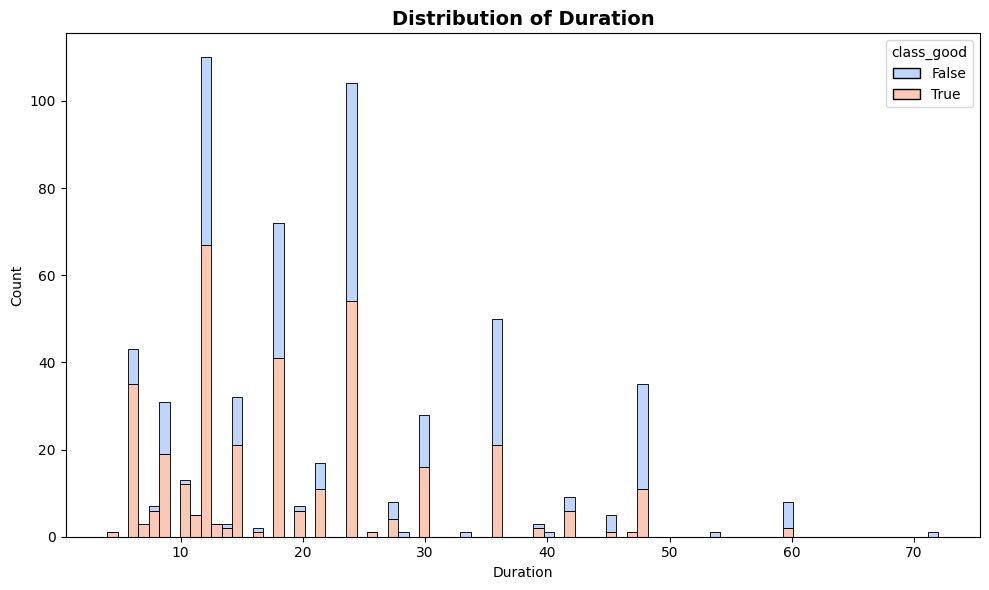

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset_checking_status_below_0_5' is your original dataset
# Combine the 'duration' feature with 'class_good' for easier plotting
data = pd.concat([dataset_checking_status_below_0_5['duration'], dataset_checking_status_below_0_5['class_good']], axis=1)
data.columns = ['duration', 'class_good']

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot a histogram with hue as 'class_good'
sns.histplot(data=data, x='duration', hue='class_good', multiple='stack', palette='coolwarm', bins=80)

# Set titles and labels
plt.title('Distribution of Duration', fontsize=14, fontweight='bold')
plt.xlabel('Duration')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()



#Looks like we have a higher % of true values below 27 than above 27, let's split the dataset accordingly

In [59]:

# Split the dataset into two new datasets based on the 'duration' column
dataset_duration_above_27 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['duration'] > 27]
dataset_duration_below_or_equal_27 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['duration'] <= 27]

# Display the shapes of the new datasets
print(f"Dataset with duration > 27: {dataset_duration_above_27.shape}")
print(f"Dataset with duration <= 27: {dataset_duration_below_or_equal_27.shape}")


Dataset with duration > 27: (144, 49)
Dataset with duration <= 27: (462, 49)


#Rerun the ML Algorithm on these datasets

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load your datasets
datasets = {
    'dataset_duration_above_27': dataset_duration_above_27,
    'dataset_duration_below_or_equal_27': dataset_duration_below_or_equal_27
}

# Dictionary to store metrics for each dataset and model
all_metrics = {}

# Loop through each dataset
for dataset_name, dataset in datasets.items():
    print(f"Processing dataset: {dataset_name}")

    # Split features and target
    X = dataset.drop('class_good', axis=1)
    y = dataset['class_good']

    # Check if the dataset has enough samples
    if X.shape[0] < 10:  # Adjust the threshold as needed
        print(f"Not enough samples in {dataset_name} to split the dataset.")
        continue

    # Split the dataset into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Dictionary to store metrics for each model in the current dataset
    metrics = {}

    # 1. Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train, y_train)
    y_pred_tree = decision_tree.predict(X_test)

    metrics['Decision Tree'] = {
        'accuracy': accuracy_score(y_test, y_pred_tree),
        'classification_report': classification_report(y_test, y_pred_tree)
    }

    # 2. Logistic Regression
    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train_scaled, y_train)
    y_pred_log_reg = log_reg.predict(X_test_scaled)

    metrics['Logistic Regression'] = {
        'accuracy': accuracy_score(y_test, y_pred_log_reg),
        'classification_report': classification_report(y_test, y_pred_log_reg)
    }

    # 3. K-Means Clustering (unsupervised, using clusters as "predictions")
    kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
    kmeans.fit(X_train_scaled)
    y_pred_kmeans = kmeans.predict(X_test_scaled)

    metrics['K-Means'] = {
        'accuracy': accuracy_score(y_test, y_pred_kmeans),
        'classification_report': classification_report(y_test, y_pred_kmeans)
    }

    # 4. SVM (Support Vector Machine)
    svm = SVC(random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)

    metrics['SVM'] = {
        'accuracy': accuracy_score(y_test, y_pred_svm),
        'classification_report': classification_report(y_test, y_pred_svm)
    }

    # Store metrics for the current dataset
    all_metrics[dataset_name] = metrics

# Print the evaluation metrics for each dataset and model
for dataset_name, model_metrics in all_metrics.items():
    print(f"Dataset: {dataset_name}")
    for model_name, metric in model_metrics.items():
        print(f"  Model: {model_name}")
        print("  Accuracy:", metric['accuracy'])
        print("  Classification Report:\n", metric['classification_report'])
        print("\n")



Processing dataset: dataset_duration_above_27
Processing dataset: dataset_duration_below_or_equal_27
Dataset: dataset_duration_above_27
  Model: Decision Tree
  Accuracy: 0.5
  Classification Report:
               precision    recall  f1-score   support

       False       0.61      0.52      0.56        27
        True       0.38      0.47      0.42        17

    accuracy                           0.50        44
   macro avg       0.49      0.49      0.49        44
weighted avg       0.52      0.50      0.51        44



  Model: Logistic Regression
  Accuracy: 0.6363636363636364
  Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.74      0.71        27
        True       0.53      0.47      0.50        17

    accuracy                           0.64        44
   macro avg       0.61      0.61      0.61        44
weighted avg       0.63      0.64      0.63        44



  Model: K-Means
  Accuracy: 0.5909090909090909
  Class

#Mediocre Results - but slightly better than purpose_new_car.  Sample sizes on each side are similar as well.

dataset_duration_above_27 = SVM 72.73% (44)

dataset_duration_below_or_equal_27 = LR 66.91% (139)

#So far we have:

A. dataset_credit_history_below_0_5 = SVM 74.17% (213) *(Next Investigation)*

B. **dataset_credit_history_above_0_5 = SVM 82.95% (88) (KEEP)**

C. dataset_checking_status_below_0_5 = SVM 67.58% *(Split into duration above/below 27)*


1.     **dataset_duration_above_27 = SVM 72.73% (44) (KEEP)**
2.     **dataset_duration_below_or_equal_27 = LR 66.91% (139) (KEEP)**


D. **dataset_checking_status_above_0_5 = LR 89.08% (119) (KEEP)**

Since dataset_credit_history_below_0_5 has the largest sample size at 213, we really want to try to improve the overall acurracy %.

In [ ]:
#STOPPED HERE!!! BELOW IS OLD STUFF!!!!

#Focus on the most important feature and divide up the dataset

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Function to perform logistic regression on a dataset with _1 suffix
def logistic_regression_on_dataset_1(X_1, y_1, dataset_name):
    # Standardize the features
    scaler_1 = StandardScaler()
    X_scaled_1 = scaler_1.fit_transform(X_1)

    # Split the data into training and test sets
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaled_1, y_1, test_size=0.3, random_state=42)

    # Create and fit the logistic regression model
    model_1 = LogisticRegression(max_iter=1000)
    model_1.fit(X_train_1, y_train_1)

    # Make predictions
    y_pred_1 = model_1.predict(X_test_1)

    # Evaluate the model
    accuracy_1 = accuracy_score(y_test_1, y_pred_1)
    report_1 = classification_report(y_test_1, y_pred_1)

    print(f"Logistic Regression on {dataset_name} (with _1 suffix):")
    print(f"Accuracy: {accuracy_1}")
    print(f"Classification Report:\n{report_1}")
    print("-" * 80)

# Assuming 'class_good_1' is the target variable in each dataset

# Logistic Regression on credit_history_critical < 0.5
X_1_1 = dataset_credit_history_below_0_5.drop('class_good', axis=1)
y_1_1 = dataset_credit_history_below_0_5['class_good']
logistic_regression_on_dataset_1(X_1_1, y_1_1, 'credit_history_critical < 0.5')

# Logistic Regression on credit_history_critical >= 0.5
X_2_1 = dataset_credit_history_above_0_5.drop('class_good', axis=1)
y_2_1 = dataset_credit_history_above_0_5['class_good']
logistic_regression_on_dataset_1(X_2_1, y_2_1, 'credit_history_critical >= 0.5')

# Logistic Regression on checking_status_no checking < 0.5
X_3_1 = dataset_checking_status_below_0_5.drop('class_good', axis=1)
y_3_1 = dataset_checking_status_below_0_5['class_good']
logistic_regression_on_dataset_1(X_3_1, y_3_1, 'checking_status_no checking < 0.5')

# Logistic Regression on checking_status_no checking >= 0.5
X_4_1 = dataset_checking_status_above_0_5.drop('class_good', axis=1)
y_4_1 = dataset_checking_status_above_0_5['class_good']
logistic_regression_on_dataset_1(X_4_1, y_4_1, 'checking_status_no checking >= 0.5')



Logistic Regression on credit_history_critical < 0.5 (with _1 suffix):
Accuracy: 0.7323943661971831
Classification Report:
              precision    recall  f1-score   support

       False       0.65      0.59      0.62        78
        True       0.77      0.81      0.79       135

    accuracy                           0.73       213
   macro avg       0.71      0.70      0.71       213
weighted avg       0.73      0.73      0.73       213

--------------------------------------------------------------------------------
Logistic Regression on credit_history_critical >= 0.5 (with _1 suffix):
Accuracy: 0.7613636363636364
Classification Report:
              precision    recall  f1-score   support

       False       0.29      0.27      0.28        15
        True       0.85      0.86      0.86        73

    accuracy                           0.76        88
   macro avg       0.57      0.56      0.57        88
weighted avg       0.75      0.76      0.76        88

------------------

#Let's keep "checking_status_no checking >= 0.5" as we have 89% accuracy and focus on chopping up the "checking_status_no checking < 0.5" portion and improving the 62% accuracy

In [14]:
import pandas as pd

# Prepare the dataset where checking_status_no checking < 0.5 with '_1' suffix
X_checking_below_0_5_1 = dataset_checking_status_below_0_5.drop('class_good', axis=1)
y_checking_below_0_5_1 = dataset_checking_status_below_0_5['class_good']

# Standardize the features
scaler_checking_below_0_5_1 = StandardScaler()
X_scaled_checking_below_0_5_1 = scaler_checking_below_0_5_1.fit_transform(X_checking_below_0_5_1)

# Split the dataset into training and test sets
X_train_checking_below_0_5_1, X_test_checking_below_0_5_1, y_train_checking_below_0_5_1, y_test_checking_below_0_5_1 = train_test_split(
    X_scaled_checking_below_0_5_1, y_checking_below_0_5_1, test_size=0.25, random_state=42)

# Initialize and train the Logistic Regression model
model_checking_below_0_5_1 = LogisticRegression(max_iter=2000)
model_checking_below_0_5_1.fit(X_train_checking_below_0_5_1, y_train_checking_below_0_5_1)

# Get feature importances
coefficients = model_checking_below_0_5_1.coef_[0]
features = X_checking_below_0_5_1.columns
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


                                          Feature  Coefficient
10  credit_history_critical/other existing credit     0.797888
11              credit_history_delayed previously     0.491829
12                   credit_history_existing paid     0.461292
26                savings_status_no known savings     0.351501
34                        other_parties_guarantor     0.324281
27                              employment_4<=X<7     0.304578
8                           checking_status_>=200     0.263679
33                    personal_status_male single     0.256800
21                             purpose_retraining     0.255188
25                          savings_status_>=1000     0.224801
38                 property_magnitude_real estate     0.108568
29                                 employment_>=7     0.075025
39                       other_payment_plans_none     0.068505
46                              own_telephone_yes     0.067372
28                                  employment_<1     0

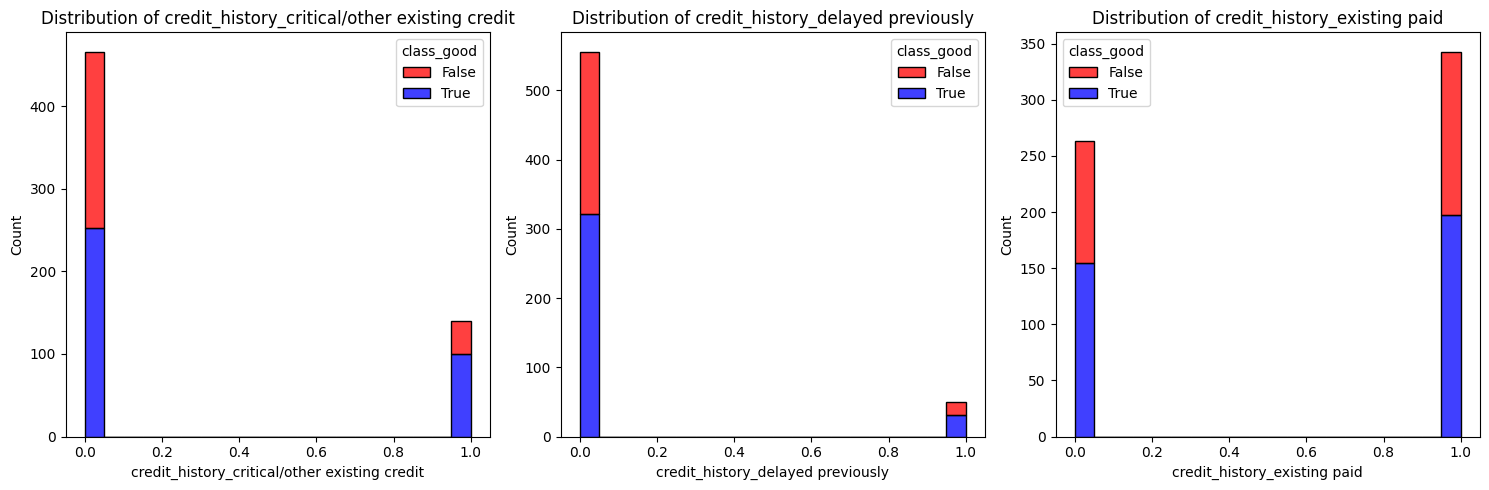

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['credit_history_critical/other existing credit',
             'credit_history_delayed previously',
             'credit_history_existing paid']

# Set up the plot
plt.figure(figsize=(15, 5))

# Iterate through each feature and plot its distribution
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)

    # Combine the feature with the class_good for easier plotting
    data = pd.concat([dataset_checking_status_below_0_5[feature], dataset_checking_status_below_0_5['class_good']], axis=1)
    data.columns = [feature, 'class_good']

    # Plot the distribution of the feature values for each class
    sns.histplot(data=data, x=feature, hue='class_good', multiple='stack', palette={True: 'blue', False: 'red'}, bins=20)

    # Set titles and labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

#Now within the "checking_status_no checking < 0.5", we can see that "credit_history_delayed previously" has most of the samples in the false category and they're evenly distributed.  Let's focus on that portion.

In [16]:
# Assuming 'dataset_checking_status_below_0_5' is the DataFrame you want to work with

# Create datasets based on 'credit_history_delayed previously' condition
dataset_credit_delayed_above_0_5 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['credit_history_delayed previously'] > 0.5]
dataset_credit_delayed_below_or_equal_0_5 = dataset_checking_status_below_0_5[dataset_checking_status_below_0_5['credit_history_delayed previously'] <= 0.5]

# Display the shapes of the new datasets
print("Dataset with 'credit_history_delayed previously' > 0.5 shape:", dataset_credit_delayed_above_0_5.shape)
print("Dataset with 'credit_history_delayed previously' <= 0.5 shape:", dataset_credit_delayed_below_or_equal_0_5.shape)

# Drop the column "checking_status_no checking" from each dataset
dataset_credit_delayed_above_0_5__48 = dataset_credit_delayed_above_0_5.drop(columns=['checking_status_no checking'])
dataset_credit_delayed_below_or_equal_0_5__48 = dataset_credit_delayed_below_or_equal_0_5.drop(columns=['checking_status_no checking'])

# Display the shapes of the updated datasets
print("Updated dataset with 'credit_history_delayed previously' > 0.5 shape:", dataset_credit_delayed_above_0_5__48.shape)
print("Updated dataset with 'credit_history_delayed previously' <= 0.5 shape:", dataset_credit_delayed_below_or_equal_0_5__48.shape)



Dataset with 'credit_history_delayed previously' > 0.5 shape: (50, 49)
Dataset with 'credit_history_delayed previously' <= 0.5 shape: (556, 49)
Updated dataset with 'credit_history_delayed previously' > 0.5 shape: (50, 48)
Updated dataset with 'credit_history_delayed previously' <= 0.5 shape: (556, 48)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Prepare datasets for logistic regression
datasets = {
    'credit_delayed_above_0_5': dataset_credit_delayed_above_0_5__48,
    'credit_delayed_below_or_equal_0_5': dataset_credit_delayed_below_or_equal_0_5__48
}

for key, dataset in datasets.items():
    # Separate features and target variable
    X = dataset.drop('class_good', axis=1)
    y = dataset['class_good']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f"Logistic Regression on dataset {key}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


Logistic Regression on dataset credit_delayed_above_0_5:
Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.75      0.60         4
        True       0.89      0.73      0.80        11

    accuracy                           0.73        15
   macro avg       0.69      0.74      0.70        15
weighted avg       0.79      0.73      0.75        15



Logistic Regression on dataset credit_delayed_below_or_equal_0_5:
Accuracy: 0.6586826347305389
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.51      0.56        71
        True       0.68      0.77      0.72        96

    accuracy                           0.66       167
   macro avg       0.65      0.64      0.64       167
weighted avg       0.65      0.66      0.65       167





#Let's get the most we can out of "credit_delayed_above_0_5" and investigate 4 popular ML techniques:
-Decision Tree

-Logistic Regression

-Kmeans clustering

-SVM

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Split features and target
X = dataset_credit_delayed_above_0_5__48.drop('class_good', axis=1)
y = dataset_credit_delayed_above_0_5__48['class_good']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store metrics for each model
metrics = {}

# 1. Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

metrics['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred_tree),
    'classification_report': classification_report(y_test, y_pred_tree)
}

# 2. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

metrics['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_log_reg),
    'classification_report': classification_report(y_test, y_pred_log_reg)
}

# 3. K-Means Clustering (unsupervised, using clusters as "predictions")
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Map the clusters to the target labels for evaluation
# This assumes the clusters might map closely to 'class_good' (use cluster 0/1 for simplicity)
metrics['K-Means'] = {
    'accuracy': accuracy_score(y_test, y_pred_kmeans),
    'classification_report': classification_report(y_test, y_pred_kmeans)
}

# 4. SVM (Support Vector Machine)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

metrics['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'classification_report': classification_report(y_test, y_pred_svm)
}

# Print the evaluation metrics for each model
for model_name, metric in metrics.items():
    print(f"Model: {model_name}")
    print("Accuracy:", metric['accuracy'])
    print("Classification Report:\n", metric['classification_report'])
    print("\n")

Model: Decision Tree
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

       False       0.40      0.50      0.44         4
        True       0.80      0.73      0.76        11

    accuracy                           0.67        15
   macro avg       0.60      0.61      0.60        15
weighted avg       0.69      0.67      0.68        15



Model: Logistic Regression
Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.75      0.60         4
        True       0.89      0.73      0.80        11

    accuracy                           0.73        15
   macro avg       0.69      0.74      0.70        15
weighted avg       0.79      0.73      0.75        15



Model: K-Means
Accuracy: 0.2
Classification Report:
               precision    recall  f1-score   support

       False       0.17      0.50      0.25         4
        True       0.33   

#OK so we'll stick with Logistic Regression, let's try these 4 on the larger dataset: "credit_delayed_below_or_equal_0_5"

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load your dataset
# dataset_credit_delayed_below_or_equal_0_5__48 = pd.read_csv('path_to_your_dataset.csv')

# Split features and target
X = dataset_credit_delayed_below_or_equal_0_5__48.drop('class_good', axis=1)
y = dataset_credit_delayed_below_or_equal_0_5__48['class_good']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store metrics for each model
metrics = {}

# 1. Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

metrics['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred_tree),
    'classification_report': classification_report(y_test, y_pred_tree)
}

# 2. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

metrics['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_log_reg),
    'classification_report': classification_report(y_test, y_pred_log_reg)
}

# 3. K-Means Clustering (unsupervised, using clusters as "predictions")
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Map the clusters to the target labels for evaluation
metrics['K-Means'] = {
    'accuracy': accuracy_score(y_test, y_pred_kmeans),
    'classification_report': classification_report(y_test, y_pred_kmeans)
}

# 4. SVM (Support Vector Machine)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

metrics['SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'classification_report': classification_report(y_test, y_pred_svm)
}

# Print the evaluation metrics for each model
for model_name, metric in metrics.items():
    print(f"Model: {model_name}")
    print("Accuracy:", metric['accuracy'])
    print("Classification Report:\n", metric['classification_report'])
    print("\n")


Model: Decision Tree
Accuracy: 0.592814371257485
Classification Report:
               precision    recall  f1-score   support

       False       0.52      0.51      0.51        71
        True       0.64      0.66      0.65        96

    accuracy                           0.59       167
   macro avg       0.58      0.58      0.58       167
weighted avg       0.59      0.59      0.59       167



Model: Logistic Regression
Accuracy: 0.6586826347305389
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.51      0.56        71
        True       0.68      0.77      0.72        96

    accuracy                           0.66       167
   macro avg       0.65      0.64      0.64       167
weighted avg       0.65      0.66      0.65       167



Model: K-Means
Accuracy: 0.5029940119760479
Classification Report:
               precision    recall  f1-score   support

       False       0.41      0.41      0.41        71
        True

#OK SVM it is then! So far we have:
-Logistic Regression on checking_status_no checking >= 0.5 for 89% accuracy

-Opening up checking_status_no checking < 0.5, we have

#That's not much help at 66%, so let's try a diffent ML model on that dataset only.

Decision Tree Accuracy (max_depth=6): 0.6115107913669064
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.57      0.48      0.52        61
        True       0.64      0.72      0.67        78

    accuracy                           0.61       139
   macro avg       0.60      0.60      0.60       139
weighted avg       0.61      0.61      0.61       139



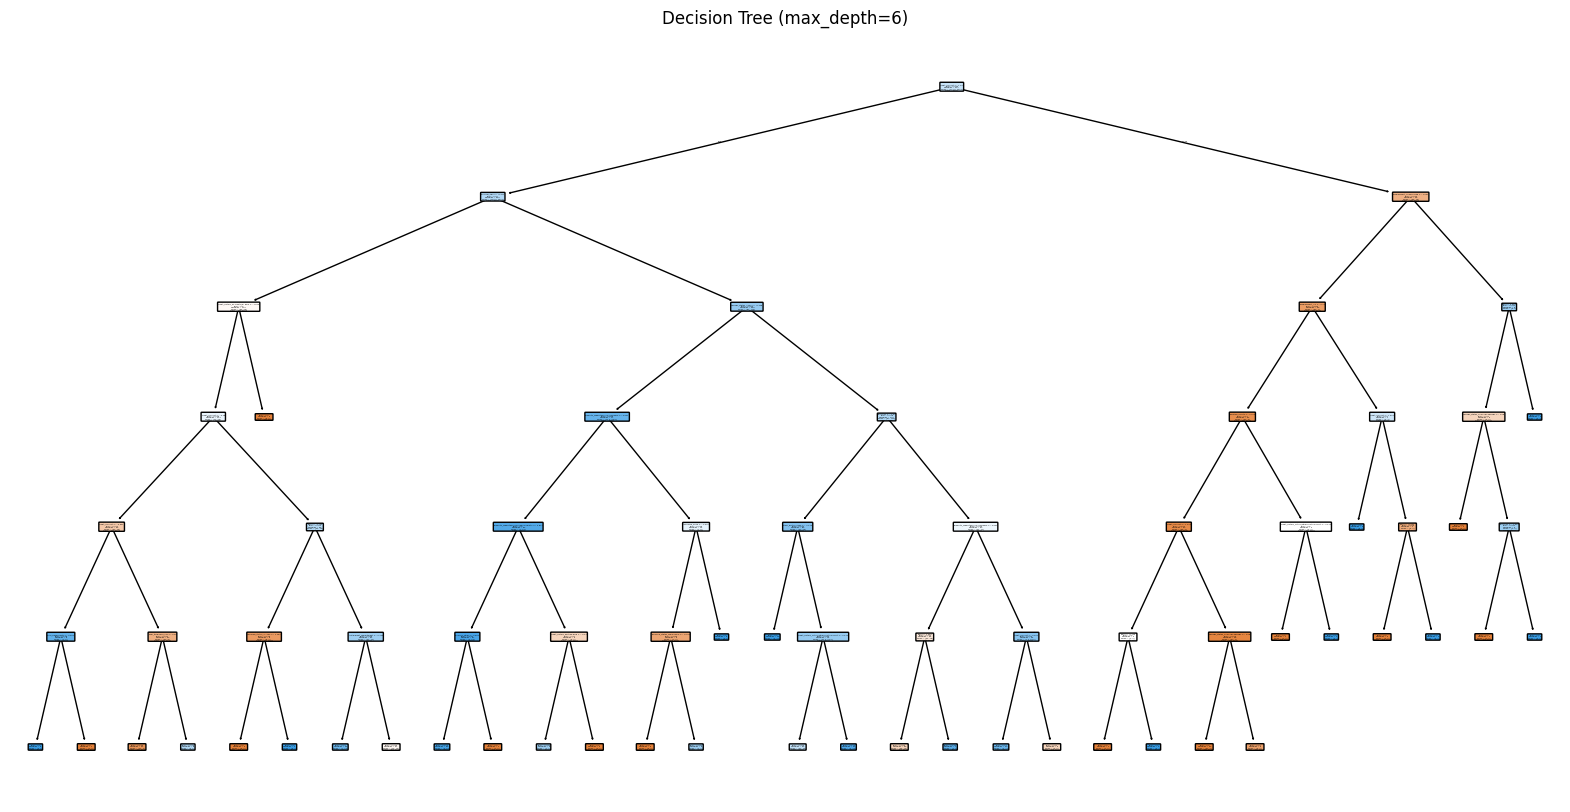

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the dataset
X = dataset_credit_delayed_below_or_equal_0_5__48.drop('class_good', axis=1)
y = dataset_credit_delayed_below_or_equal_0_5__48['class_good']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Set the maximum depth of the decision tree
max_depth = 6  # You can change this value to control the depth

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print(f"Decision Tree Accuracy (max_depth={max_depth}):", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Good', 'Good'], rounded=True)
plt.title(f"Decision Tree (max_depth={max_depth})")
plt.show()


Feature Importance for dataset credit_delayed_below_or_equal_0_5:
                                          Feature  Coefficient
10  credit_history_critical/other existing credit     0.702237
12                   credit_history_existing paid     0.530088
23                     savings_status_500<=X<1000     0.468722
25                          savings_status_>=1000     0.368193
27                              employment_4<=X<7     0.338488
8                           checking_status_>=200     0.310976
26                savings_status_no known savings     0.287673
21                             purpose_retraining     0.284320
33                    personal_status_male single     0.272064
34                        other_parties_guarantor     0.266267
22                               purpose_used car     0.173871
30                          employment_unemployed     0.171384
4                                             age     0.167850
28                                  employment_<1   

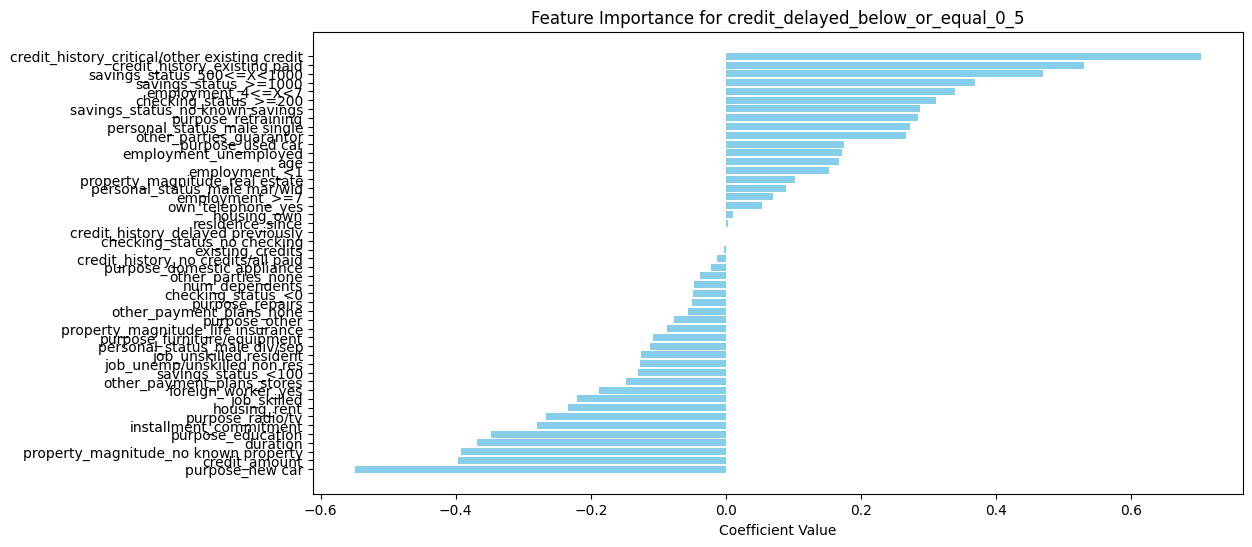

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare datasets for logistic regression
datasets = {
    'credit_delayed_below_or_equal_0_5': dataset_credit_delayed_below_or_equal_0_5
}

for key, dataset in datasets.items():
    # Separate features and target variable
    X = dataset.drop('class_good', axis=1)
    y = dataset['class_good']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Extract feature names and coefficients
    feature_names = X.columns
    coefficients = model.coef_[0]

    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Print feature importance
    print(f"Feature Importance for dataset {key}:")
    print(importance_df)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Importance for {key}')
    plt.gca().invert_yaxis()
    plt.show()


Decision Tree Accuracy (max_depth=5): 0.6052631578947368
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.18      0.29        67
        True       0.59      0.94      0.73        85

    accuracy                           0.61       152
   macro avg       0.65      0.56      0.51       152
weighted avg       0.64      0.61      0.53       152



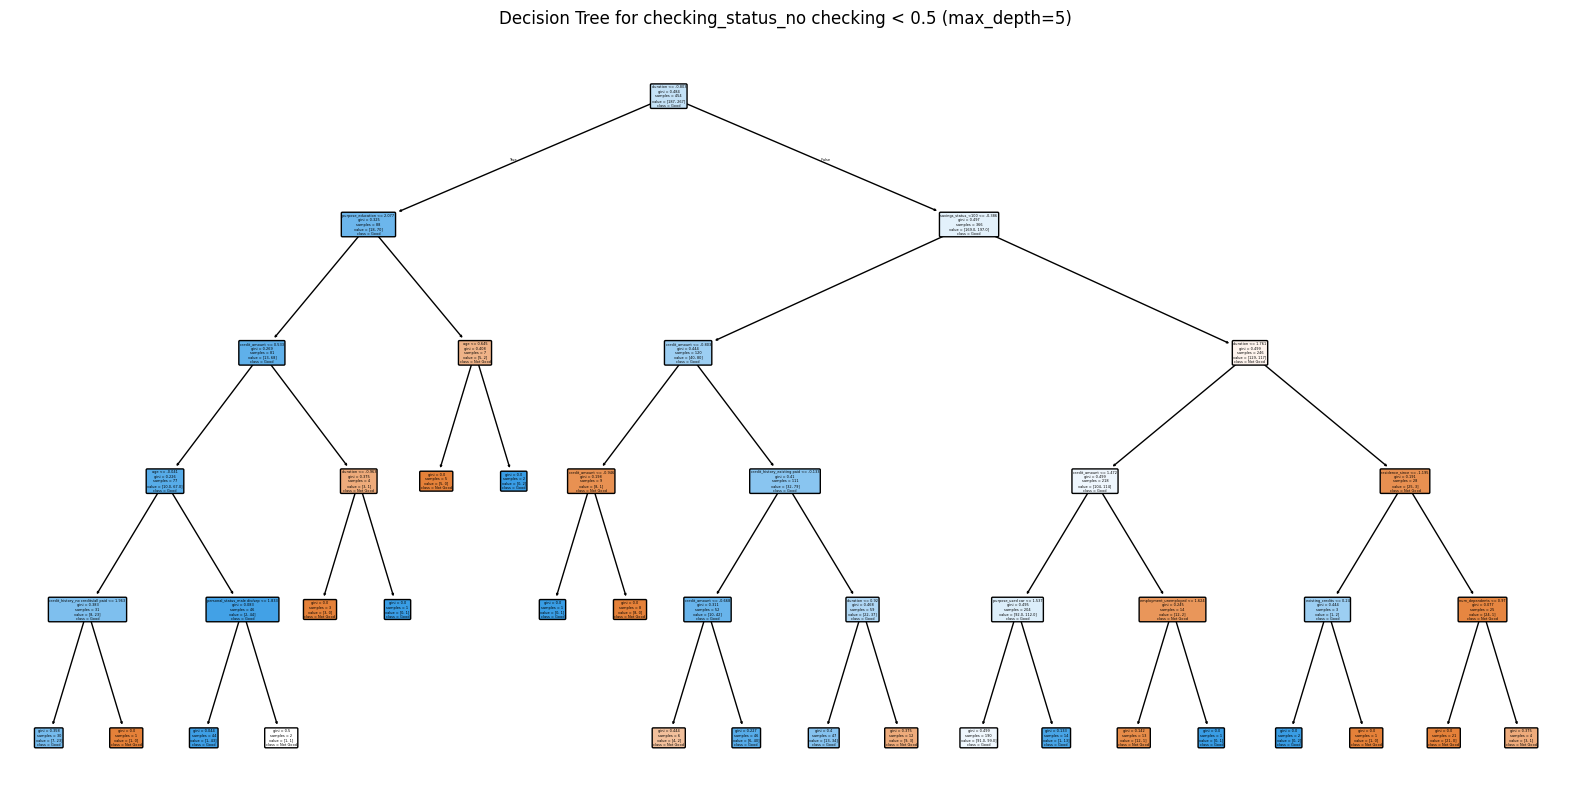

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the dataset where checking_status_no checking < 0.5
X_checking_below_0_5 = dataset_checking_status_below_0_5.drop('class_good', axis=1)
y_checking_below_0_5 = dataset_checking_status_below_0_5['class_good']

# Standardize the features
scaler_checking_below_0_5 = StandardScaler()
X_scaled_checking_below_0_5 = scaler_checking_below_0_5.fit_transform(X_checking_below_0_5)

# Split the dataset into training and test sets
X_train_checking_below_0_5, X_test_checking_below_0_5, y_train_checking_below_0_5, y_test_checking_below_0_5 = train_test_split(
    X_scaled_checking_below_0_5, y_checking_below_0_5, test_size=0.25, random_state=42)

# Set the maximum depth of the decision tree
max_depth = 5  # You can change this value to control tree depth

# Initialize and train the Decision Tree model with max_depth parameter
model_checking_below_0_5 = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
model_checking_below_0_5.fit(X_train_checking_below_0_5, y_train_checking_below_0_5)

# Make predictions
y_pred_checking_below_0_5 = model_checking_below_0_5.predict(X_test_checking_below_0_5)

# Evaluation metrics
print(f"Decision Tree Accuracy (max_depth={max_depth}):", accuracy_score(y_test_checking_below_0_5, y_pred_checking_below_0_5))
print("Decision Tree Classification Report:\n", classification_report(y_test_checking_below_0_5, y_pred_checking_below_0_5))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model_checking_below_0_5, filled=True, feature_names=X_checking_below_0_5.columns, class_names=['Not Good', 'Good'], rounded=True)
plt.title(f"Decision Tree for checking_status_no checking < 0.5 (max_depth={max_depth})")
plt.show()
